In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load the data

In [2]:
# original dataset https://data.world/vlad/credit-card-fraud-detection
data = pd.read_csv('credit-cards-fraud-detection.csv')

In [3]:
data.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142404.000000,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# drop redundant columns
data.drop(columns=['Time', 'Unnamed: 0'], inplace=True)

In [5]:
data.head()  # categoric and numeric features (continous and discrite)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# rename column
data.rename(columns={'Class': 'isFraud'}, inplace=True)

In [7]:
fraud_series = data['isFraud']

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Use PCA to reduce dataset size

### First rescale data

In [9]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

We need to pick appropriate number of components that would explain variance of the data set between 92–99%.

In [10]:
pca = PCA(n_components = 0.92)
pca.fit(data_rescaled)
data_reduced = pca.transform(data_rescaled)

### Plot number of components and score

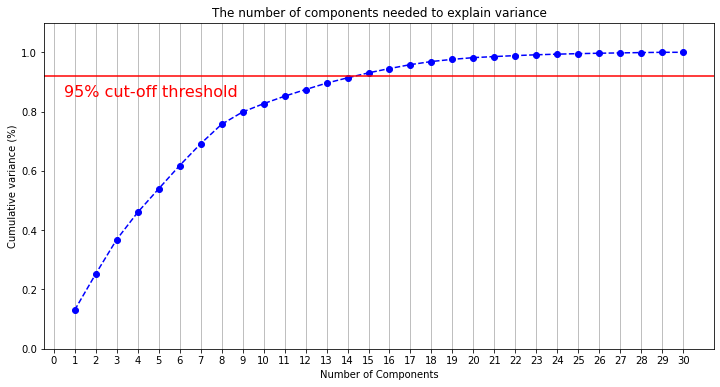

In [11]:
pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.92, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [12]:
data = pd.DataFrame(data_reduced)  # create dataframe with
data['isFraud'] = fraud_series

### How many anomalies are in the data set

In [13]:
n_normal_data = data['isFraud'].value_counts()[0]
n_anomalies = data['isFraud'].value_counts()[1]
print(f'Data set contains: {n_normal_data} normal observations and anomalies: {n_anomalies}')
print('Contamination: {}%'.format(round(n_anomalies/n_normal_data, 4)))

Data set contains: 284315 normal observations and anomalies: 492
Contamination: 0.0017%


In [14]:
# remap isFraud column values, because the IsolationForest algorithm assigns a '-1' label for anomalies and '1' for normal observations 
data["isFraud"] = data["isFraud"].map({1: -1, 0: 1})

In [15]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,isFraud
0,0.008999,-0.030861,-0.076764,0.109652,0.048914,0.030656,-0.049852,-0.001507,0.004754,0.019588,-0.010591,-0.012169,0.021349,0.022335,-0.007790,1
1,-0.045849,0.020594,0.037812,0.047311,0.011959,0.040651,0.084343,-0.004900,-0.041333,-0.021875,0.020755,0.028797,-0.023114,0.002608,-0.009506,1
2,-0.092867,-0.022750,0.055535,0.175351,-0.142099,0.105534,0.040551,0.005063,0.008331,-0.049954,-0.003552,-0.035001,0.022413,-0.007762,0.018815,1
3,-0.158295,-0.036367,0.039412,-0.046898,-0.109538,0.001588,-0.009424,-0.124709,0.045125,-0.046715,0.009454,0.000046,0.010928,-0.005180,-0.036366,1
4,0.019048,0.082020,0.104204,0.013102,0.055714,-0.023870,-0.054023,0.007461,0.000571,0.020324,0.042182,-0.036953,0.007723,0.026096,0.011142,1


## Isolation Forest algorithm

In [16]:
X, y = data.loc[:,:14], data.loc[:,'isFraud':]

Declare Isolation Forest algoirthm with appropriate parameters. We set contamination parameter to 'auto' as in real world most of the time we don't know the amount of anomalies/outliers in our dataset.

In [17]:
X.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='object')

Time spent fitting model with data reduced PCA (15 components) took around 2 minutes.  

In [18]:
%%time
model = LocalOutlierFactor(contamination='auto',
                        n_neighbors = 20,
                        leaf_size = 30,
                        metric = 'minkowski',
                        n_jobs = -1) # use all cpu cores
data["isAnomaly"] = model.fit_predict(X)

Wall time: 1min 48s


In [19]:
data["isAnomaly"].value_counts()

 1    260845
-1     23962
Name: isAnomaly, dtype: int64

Model predictions

In [20]:
n_normal_data = data['isAnomaly'].value_counts()[1]
n_anomalies = data['isAnomaly'].value_counts()[-1]
predicted_contamination = round(n_anomalies/n_normal_data, 4)

print(f'According to model predictions, data set contains: {n_normal_data} normal observations and anomalies: {n_anomalies}')
print('Contamination: {}%'.format(predicted_contamination))

According to model predictions, data set contains: 260845 normal observations and anomalies: 23962
Contamination: 0.0919%


In [21]:
# add column with scores for each observation - how the model is certain that the observation is an outlier
data['anomaly_score'] = model.negative_outlier_factor_

In [22]:
print(f'Observation score below which model decides it is an anomaly: {model.offset_}')

Observation score below which model decides it is an anomaly: -1.5


## Plot score distribution

In [23]:
def plt_score_distribution(threshold):
    ax = data['anomaly_score'].hist(bins=60)

    mean = data['anomaly_score'].mean()
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.text(mean, 30000, 'Mean:\n{:.4f}'.format(mean), color='r', size=18)
    ax.axvline(threshold, color='b', linestyle='dashed', linewidth=2)
    plt.text(threshold, 25000, 'Threshold:\n{:.4f}'.format(threshold), color='b', size=18)

### Plot anomaly score distribution and threshold 

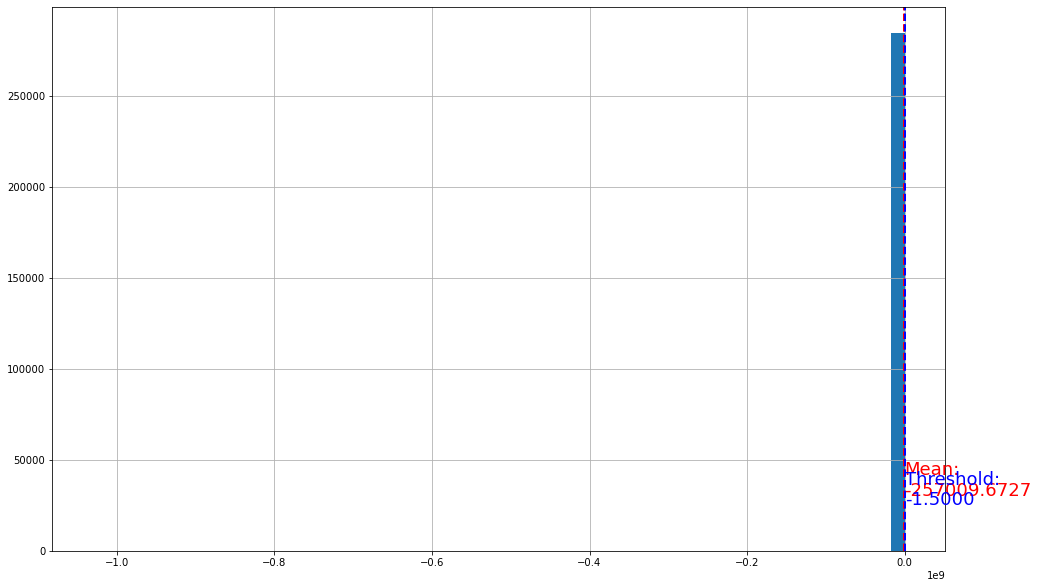

In [24]:
# original treshold
plt.figure(figsize = (16, 10))
plt_score_distribution(model.offset_)

The plot is not as clear as with the Isolation Forest algorithm. That is because LOF's anomaly score range differ siggnificantly. Let's see the highest and lowest score:

In [25]:
print(f"LOF's highest anomaly score is: {data['anomaly_score'].max()}")
print(f"LOF's lowest anomaly score is: {data['anomaly_score'].min()}")

LOF's highest anomaly score is: -0.8562960278594813
LOF's lowest anomaly score is: -1030248983.6073339


## Score model

In [26]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

To score the model we need to once again remap anomaly labels for two columns: predicted by the model and original one

In [27]:
data['isFraud'] = data['isFraud'].map({1: 0, -1: 1})
data['isAnomaly'] = data['isAnomaly'].map({1: 0, -1: 1})

In [28]:
def score_model(predictions, real):
    print('Model predictions for anomalies:')
    print('Precision: ', precision_score(real, predictions))
    print('Accuracy: ', accuracy_score(real, predictions))
    print('Recall: ', recall_score(real, predictions))

In [29]:
score_model(data['isAnomaly'], data['isFraud'])

Model predictions for anomalies:
Precision:  0.0003755946915950255
Accuracy:  0.9142015470125383
Recall:  0.018292682926829267


### Create confusion matrix of predictions

In [30]:
cf = pd.crosstab(data['isAnomaly'],
                 data['isFraud'],
                 colnames=['Real'],
                 rownames=['Predicted'])

In [31]:
cf

Real,0,1
Predicted,,
0,260362,483
1,23953,9


### Results interpretation

Model did handled well the outlier detection since the recall score (amount of outliers predicted by the model and the real outliers in the data set) is fairly high. On the other hand, the precison score of the model is low meaning that a lot of transactions were incorectly classified as outliers.

To achieve better scores we can tune model's parameters or modify the threshold for which observation is considered as outlier.

## Modyfying threshold with IQR rule

In [32]:
def iqr_bounds(scores, k=1.5):
    q1 = scores.quantile(0.25)
    q3 = scores.quantile(0.75)
    iqr = q3 - q1
    lower_bound=(q1 - k * iqr)
    upper_bound=(q3 + k * iqr)  # we need only lower bound since our scores are outlier samples have negative score
    print("Modified threshold is:{}".format(lower_bound))
    return lower_bound

modified_threshold=iqr_bounds(data['anomaly_score'], k=1.5)

Modified threshold is:-1.5264781806691645


### Assign new anomaly labels using new threshold

In [33]:
conditions  = [
    (data['anomaly_score'] < modified_threshold)
]
choices = [1]
    
data['isAnomaly_new_threshold'] = np.select(conditions, choices, default=0)

In [34]:
n_normal_data = data['isAnomaly_new_threshold'].value_counts()[0]
n_anomalies = data['isAnomaly_new_threshold'].value_counts()[1]
predicted_contamination_modified_threshold = round(n_anomalies/n_normal_data, 4)

print(f'According to model predictions with modified threshold, data set contains: {n_normal_data} normal observations and anomalies: {n_anomalies}')
print('Contamination: {}%'.format(predicted_contamination))

According to model predictions with modified threshold, data set contains: 262789 normal observations and anomalies: 22018
Contamination: 0.0919%


Amount of outliers predicted by the model (contamination) has dropped significantly. Now our recall metric should increase, because we assign an outlier label to these observations that have smaller anomaly score.

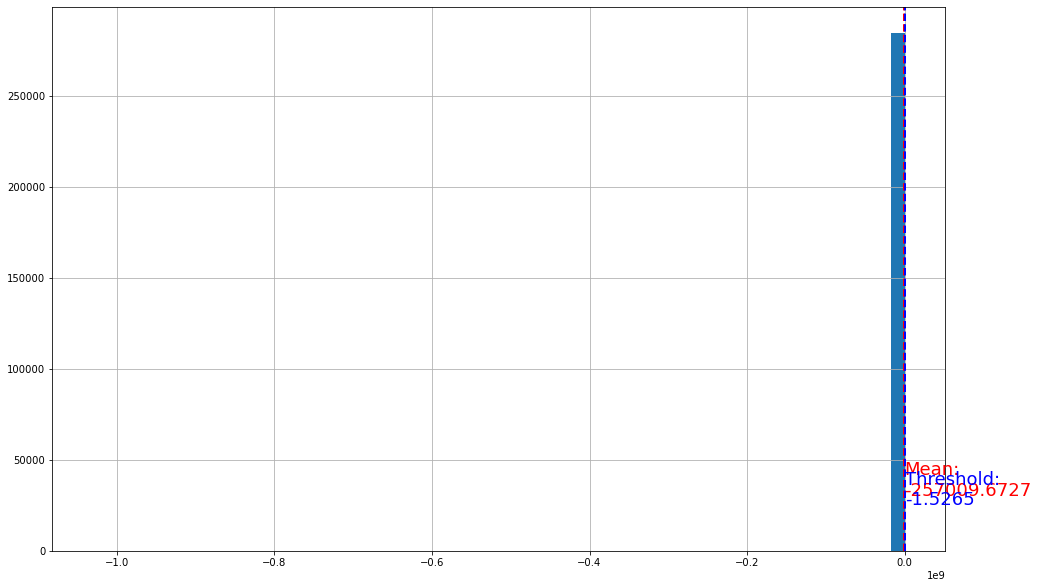

In [35]:
plt.figure(figsize = (16, 10))
plt_score_distribution(modified_threshold)

Let's view our performance metrics one again 

In [36]:
cf = pd.crosstab(data['isAnomaly_new_threshold'],
                 data['isFraud'],
                 colnames=['Real'],
                 rownames=['Predicted'])

In [37]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,isFraud,isAnomaly,anomaly_score,isAnomaly_new_threshold
0,0.008999,-0.030861,-0.076764,0.109652,0.048914,0.030656,-0.049852,-0.001507,0.004754,0.019588,-0.010591,-0.012169,0.021349,0.022335,-0.007790,0,0,-1.167481,0
1,-0.045849,0.020594,0.037812,0.047311,0.011959,0.040651,0.084343,-0.004900,-0.041333,-0.021875,0.020755,0.028797,-0.023114,0.002608,-0.009506,0,0,-1.075972,0
2,-0.092867,-0.022750,0.055535,0.175351,-0.142099,0.105534,0.040551,0.005063,0.008331,-0.049954,-0.003552,-0.035001,0.022413,-0.007762,0.018815,0,0,-1.055251,0
3,-0.158295,-0.036367,0.039412,-0.046898,-0.109538,0.001588,-0.009424,-0.124709,0.045125,-0.046715,0.009454,0.000046,0.010928,-0.005180,-0.036366,0,0,-1.157833,0
4,0.019048,0.082020,0.104204,0.013102,0.055714,-0.023870,-0.054023,0.007461,0.000571,0.020324,0.042182,-0.036953,0.007723,0.026096,0.011142,0,0,-1.044681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.068410,0.040659,-0.053122,-0.068493,-0.106045,-0.079449,-0.068691,-0.017617,-0.040569,0.027339,0.083676,0.003417,0.227339,-0.117264,-0.080086,0,0,-1.231122,0
284803,-0.136882,-0.064632,0.094063,0.087201,-0.117643,0.031624,0.015144,0.087342,-0.014213,0.007860,0.044166,-0.043001,0.004452,0.008860,0.033857,0,0,-1.119683,0
284804,0.086282,-0.014272,-0.014211,0.099435,-0.047500,0.003748,0.030101,-0.027329,0.006932,0.013527,0.011062,-0.028228,-0.035828,-0.004468,-0.014195,0,1,-1.528530,1
284805,0.016630,0.089276,-0.080603,0.146790,0.192120,-0.106969,-0.135219,-0.063163,0.029619,0.024857,-0.026479,-0.036958,0.010760,-0.009568,0.032014,0,0,-1.022535,0


In [38]:
cf

Real,0,1
Predicted,,
0,262305,484
1,22010,8


In [39]:
score_model(data['isAnomaly_new_threshold'], data['isFraud'])

Model predictions for anomalies:
Precision:  0.0003633390862021982
Accuracy:  0.9210201996439694
Recall:  0.016260162601626018


The recall has decreased, but accuracy (ratio of correctly assigned label to observations) of the model increased. We still do not get satisfactory results with precision and recall. We may need to tune our model with new parameters or choose different algorithm.